##**GRIP TSF**

##*Task 2 -> Exploring Unsupervised ML - K Means Clustering*
#*By* ***Aneesh Panchal***
---
> Predict the optimum number of clusters and represent it visually. 
>> In this task,we will use the iris dataset,to predict the optimum number of clusters.

**Importing Important Libraries required in this notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

**Importing and Reading required Data**

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


##**The Elbow Method**
**The Elbow Method is used to choose the optimum number of clusters for the given data by plotting a graph and finding Within Cluster Sum of Squared distances (WCSS).**

Elbow occurs when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

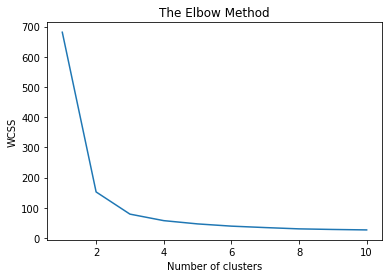

In [3]:
from sklearn.cluster import KMeans

x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

**From the graph it is clear that why it is called The Elbow Method as we can clearly see the Elbow in the graph. It is clear that Elbow occurs at 2-3. So we can choose any of these. For our convinience we are choosing 3 clusters.**

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

##**Plotting the Clusters**
**By using Elbow Method we have choosen 3 optimum clusters for the given data.**

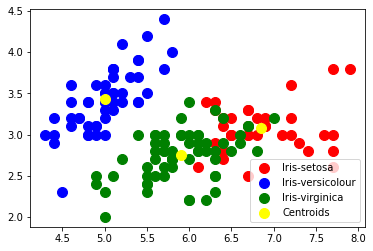

In [5]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

**To clearly visualize the clusters and their centroids. We are blurring the data upto some extend. So that centroids are clearly visible for normal eyes.**

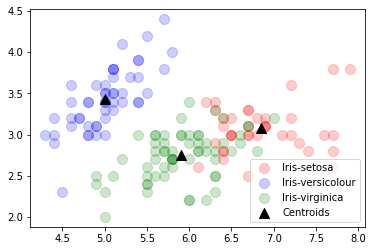

In [6]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa', alpha = 0.2)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour', alpha = 0.2)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica', alpha = 0.2)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, marker = '^', c = 'black', label = 'Centroids')
plt.legend()

##**Task 2 Completed ! Thank You !**